## CNN continue

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2022-07-28 14:09:43.108107: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [2]:
model = tf.keras.Sequential([tf.keras.Input([16, ]), tf.keras.layers.Dense(50), tf.keras.layers.Dense(20)])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                850       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
Total params: 1,870
Trainable params: 1,870
Non-trainable params: 0
_________________________________________________________________


2022-07-28 14:09:45.185815: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-07-28 14:09:45.242872: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: GeForce RTX 2080 computeCapability: 7.5
coreClock: 1.71GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.23GiB/s
2022-07-28 14:09:45.243618: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 1 with properties: 
pciBusID: 0000:04:00.0 name: GeForce RTX 2080 computeCapability: 7.5
coreClock: 1.71GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.23GiB/s
2022-07-28 14:09:45.243644: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-07-28 14:09:45.245613: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2022-07

In [3]:
(x_trainval, y_trainval), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(type(x_trainval), x_trainval.shape)

x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, test_size=1/6, shuffle=True,
                                                      stratify=y_trainval, random_state=34)

print(type(x_train), x_train.shape)
print(type(x_valid), x_valid.shape)

<class 'numpy.ndarray'> (60000, 28, 28)
<class 'numpy.ndarray'> (50000, 28, 28)
<class 'numpy.ndarray'> (10000, 28, 28)


In [4]:
x_train, x_valid, x_test = x_train.astype("float32")/255, x_valid.astype("float32")/255, x_test.astype("float32")/255

print(x_train.shape)

x_train = x_train.reshape(-1, 28, 28, 1)
x_valid = x_valid.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape)

(50000, 28, 28)
(50000, 28, 28, 1)


In [5]:
cnn = tf.keras.Sequential(
    [tf.keras.layers.Conv2D(32, 3, strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)),
     tf.keras.layers.MaxPool2D(3, strides=2, padding="same"),
     tf.keras.layers.Conv2D(64, 3, strides=1, padding="same", activation="relu"),
     tf.keras.layers.MaxPool2D(3, strides=2, padding="same"),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(10, activation="softmax")
    ]
)

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [6]:
cnn.compile(loss="sparse_categorical_crossentropy",
            optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
            metrics=["accuracy"])

In [7]:
result = cnn.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_valid, y_valid))

Epoch 1/5
391/391 [==============================] - 16s 40ms/step - loss: 1.2337 - accuracy: 0.6756 - val_loss: 0.4245 - val_accuracy: 0.8826
Epoch 2/5
391/391 [==============================] - 16s 40ms/step - loss: 0.3236 - accuracy: 0.9042 - val_loss: 0.2432 - val_accuracy: 0.9299
Epoch 3/5
391/391 [==============================] - 16s 40ms/step - loss: 0.2089 - accuracy: 0.9374 - val_loss: 0.2036 - val_accuracy: 0.9404
Epoch 4/5
391/391 [==============================] - 16s 40ms/step - loss: 0.1632 - accuracy: 0.9499 - val_loss: 0.1581 - val_accuracy: 0.9531
Epoch 5/5
391/391 [==============================] - 16s 40ms/step - loss: 0.1374 - accuracy: 0.9578 - val_loss: 0.1336 - val_accuracy: 0.9580


In [8]:
test_result = cnn.evaluate(x_test, y_test)
print("test_loss : ", test_result[0])
print("test_accuracy : ", test_result[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.1208 - accuracy: 0.9591
test_loss :  0.12078461050987244
test_accuracy :  0.9591000080108643


## RNN

In [9]:
x = list()
y = list()

for i in range(10):
    lst = list(range(i, i+4))
    x.append(list(map(lambda c: [c/10], lst)))
    y.append((i+4)/10)

X = np.array(x)
Y = np.array(y)

for i in range(len(x)):
    print(x[i], y[i])

[[0.0], [0.1], [0.2], [0.3]] 0.4
[[0.1], [0.2], [0.3], [0.4]] 0.5
[[0.2], [0.3], [0.4], [0.5]] 0.6
[[0.3], [0.4], [0.5], [0.6]] 0.7
[[0.4], [0.5], [0.6], [0.7]] 0.8
[[0.5], [0.6], [0.7], [0.8]] 0.9
[[0.6], [0.7], [0.8], [0.9]] 1.0
[[0.7], [0.8], [0.9], [1.0]] 1.1
[[0.8], [0.9], [1.0], [1.1]] 1.2
[[0.9], [1.0], [1.1], [1.2]] 1.3


In [12]:
rnn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4, 1]),  ## [sequence number, feature]
    tf.keras.layers.Dense(1)
])

rnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [20]:
rnn.compile(optimizer="SGD", loss="mse")

rnn.fit(X, Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 3/10
1/1 [==============================] - 0s 693us/step - loss: 0.0108
Epoch 4/10
1/1 [==============================] - 0s 844us/step - loss: 0.0105
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0091


In [21]:
print(rnn.predict(np.array([[[1.5], [1.6], [1.7], [1.8]]])))
print(rnn.predict(np.array([[[-0.1], [0.0], [0.1], [0.2]]])))

[[1.33906]]
[[-0.0356234]]


## 감성사전

In [22]:
max_vocab = 10000
maxlen = 500
batch_size = 128

In [23]:
(input_train, y_train), (input_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_vocab)

17465344/17464789 [==============================] - 2s 0us/step


In [24]:
print(input_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [26]:
input_train = tf.keras.preprocessing.sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = tf.keras.preprocessing.sequence.pad_sequences(input_test, maxlen=maxlen)

print(input_train.shape, input_test.shape)
print(input_train[0])

(25000, 500) (25000, 500)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 

In [29]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_vocab, 100))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,017,057
Trainable params: 1,017,057
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 44s 279ms/step - loss: 0.4792 - acc: 0.7819 - val_loss: 0.3588 - val_acc: 0.8518
Epoch 2/10
157/157 [==============================] - 44s 278ms/step - loss: 0.2861 - acc: 0.8896 - val_loss: 0.4887 - val_acc: 0.8016
Epoch 3/10
157/157 [==============================] - 43s 274ms/step - loss: 0.2274 - acc: 0.9158 - val_loss: 0.3563 - val_acc: 0.8544
Epoch 4/10
157/157 [==============================] - 43s 275ms/step - loss: 0.1900 - acc: 0.9301 - val_loss: 0.4366 - val_acc: 0.8436
Epoch 5/10
157/157 [==============================] - 43s 274ms/step - loss: 0.1670 - acc: 0.9380 - val_loss: 0.3414 - val_acc: 0.8776
Epoch 6/10
157/157 [==============================] - 43s 275ms/step - loss: 0.1480 - acc: 0.9452 - val_loss: 0.3472 - val_acc: 0.8870
Epoch 7/10
157/157 [==============================] - 43s 272ms/step - loss: 0.1330 - acc: 0.9515 - val_loss: 0.3287 - val_acc: 0.8778
Epoch 8/10
157/157 [==============================] - 4

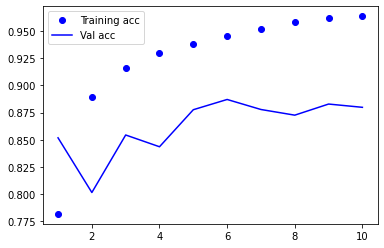

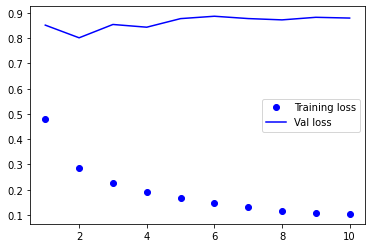

In [33]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs=range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Val acc")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_acc, "b", label="Val loss")
plt.legend()

plt.show()

In [37]:
import re
def sentiment_predict(new_sentence):
    # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
    new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()
    encoded = []
    word_to_index = tf.keras.datasets.imdb.get_word_index()

    # 띄어쓰기 단위 토큰화 후 정수 인코딩
    for word in new_sentence.split():
        try :
            # 단어 집합의 크기를 10,000으로 제한.
            if word_to_index[word] <= 10000:
                encoded.append(word_to_index[word]+3)
            else:
                # 10,000 이상의 숫자는 <unk> 토큰으로 변환.
                encoded.append(2)
        # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
        except KeyError:
            encoded.append(2)

    pad_sequence = tf.keras.preprocessing.sequence.pad_sequences([encoded], maxlen=maxlen)
    score = float(model.predict(pad_sequence)) # 예측

    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))
        
### https://www.imdb.com/title/tt10648342/reviews?sort=userRating&dir=desc&ratingFilter=0
### 토르

text='''I walked out of the theater stunned. My mind trying so hard to process what I just watched. Everyone else coming out of the theater was also speechless. I wish this movie was 5 hours long because I never wanted it to end! Comedy, action, visually stunning, sensory overload in the best way. I will rewatch this movie 5 more times just so I can try to grasp this incredible plot and put the pieces together of what I just witnessed. Love love love it, another big win in the books for Taika Waititi.'''
sentiment_predict(text)

text2='''Christian Bale is great, Russell Crowe has a good moment, Hemsworth is good but this movie cannot be saved from a terrible script, bad direction and stupid humour that overstays its welcome.'''
sentiment_predict(text2)


78.08% 확률로 긍정 리뷰입니다.
98.70% 확률로 부정 리뷰입니다.
